In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("E-commerce Website Logs new.csv")
df.head()

c:\Users\scallejo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


In [6]:
df.drop(['network_protocol', 'ip', 'bytes', 'sales', 'returned_amount'], axis=1, inplace=True)
df.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,returned,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,No,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,No,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,No,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,No,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,No,Cash


In [7]:
df = df[df['age']!="--"] 
df['age'] = df['age'].astype('int64')
df = df[df['age']!=0]

In [8]:
# Combine rows with 'Safari' and 'SafFRi'
df.loc[df['accessed_Ffom'] == 'SafFRi', 'accessed_Ffom'] = 'Safari'

# Check the updated 'accessed_Ffom' column
print("Updated accessed_Ffom:")
print(df['accessed_Ffom'].value_counts())

Updated accessed_Ffom:
Android App        18768
Chrome             13818
Mozilla Firefox    13015
Others             13007
IOS App            10627
Safari              8154
Microsoft Edge      7325
Name: accessed_Ffom, dtype: int64


In [9]:
df['language'] = df['language'].str.split().str[0].str.capitalize()
print(df['language'].value_counts())

English       49939
Chinese       10172
Spanish        7124
Russian        6013
French         3972
Italian        3643
German          955
Japanese        599
Persian         400
Thai            361
Dutch           288
Portuguese      199
Arabic          186
Polish          123
Mongolian       114
Malayalam        95
Swahili          72
Swedish          71
Nepali           71
Norwegian        58
Slovak           48
Slovene          44
Urdu             39
Romanian         36
Malay            30
Macedonian       24
Serbian          14
Tegulu           13
Marathi          11
Name: language, dtype: int64


## Distribution of ages

Text(0.5, 1.0, 'Ages of Users')

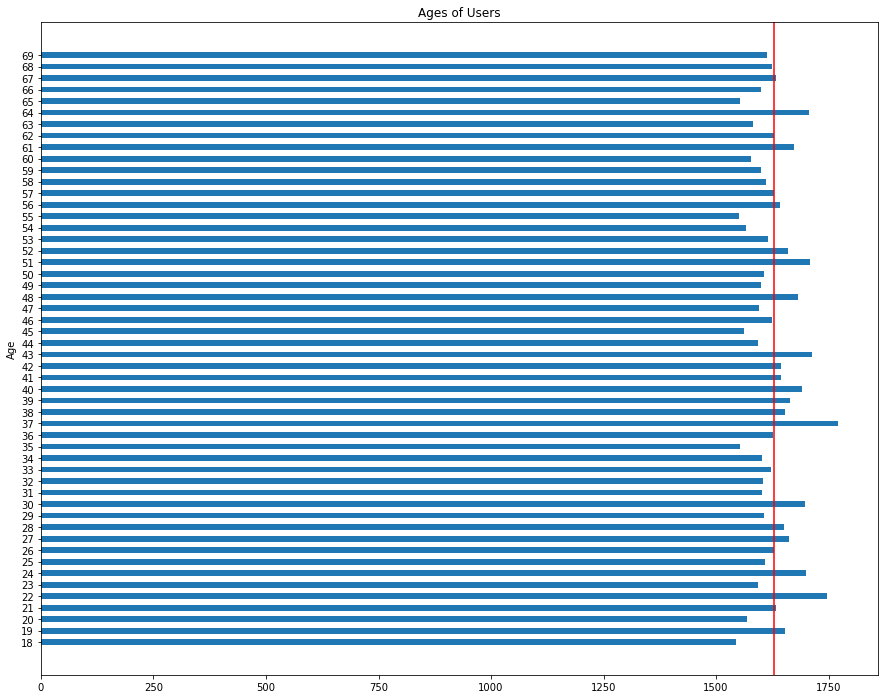

In [3]:
ages = df['age'].value_counts().sort_index()
plt.figure(figsize=(15,12))
plt.barh(ages.index, ages.values, 0.5, tick_label=ages.index)
plt.axvline(ages.values.mean(), color='r')
#, title="Ages of Users", ylabel="Age")
plt.ylabel("Age")
plt.title("Ages of Users")
#.plot(kind='barh', figsize=(15,12), title="Ages of Users", ylabel="Age")

## Distribution of Gender

<AxesSubplot:title={'center':'Gender'}>

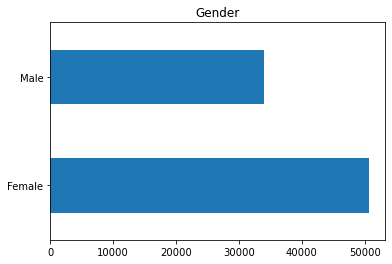

In [4]:
df['gender'].value_counts().plot(kind='barh', title='Gender')

## Target variable distribution

<AxesSubplot:title={'center':'Returned?'}>

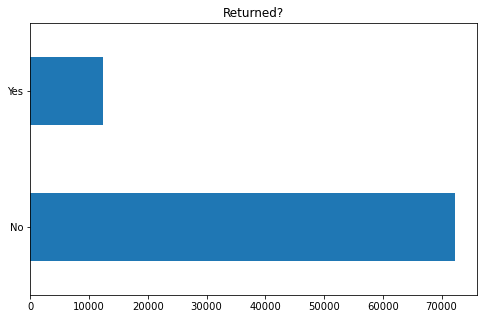

In [5]:
df['returned'].value_counts().plot(kind='barh', figsize=(8,5), title='Returned?')

<AxesSubplot:title={'center':'Returned?'}>

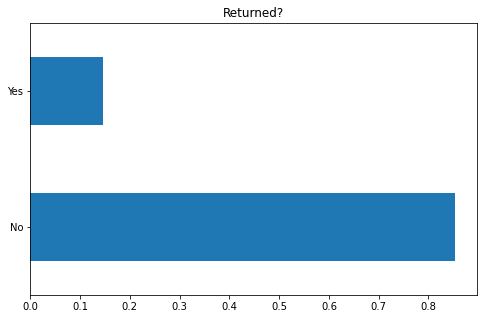

In [6]:
df['returned'].value_counts(normalize=True).plot(kind='barh', figsize=(8,5), title='Returned?')

## Payment Method Distribution

<AxesSubplot:title={'center':'Payment Methods'}>

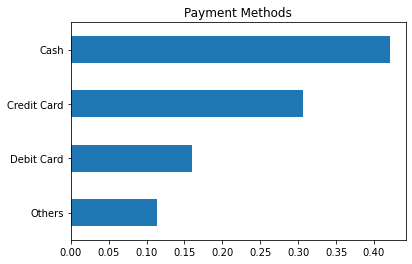

In [7]:
df['pay_method'].value_counts(ascending=True, normalize=True).plot(kind='barh', title="Payment Methods")

## Membership Distribution

<AxesSubplot:title={'center':'Membership Type'}>

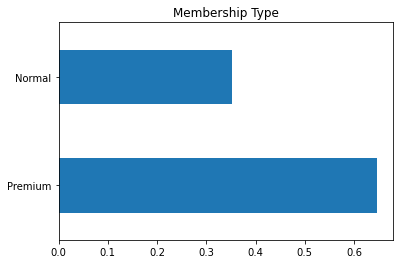

In [8]:
df['membership'].value_counts(normalize=True).plot(kind='barh', title="Membership Type")

## Language Distribution

<AxesSubplot:title={'center':'Languages'}>

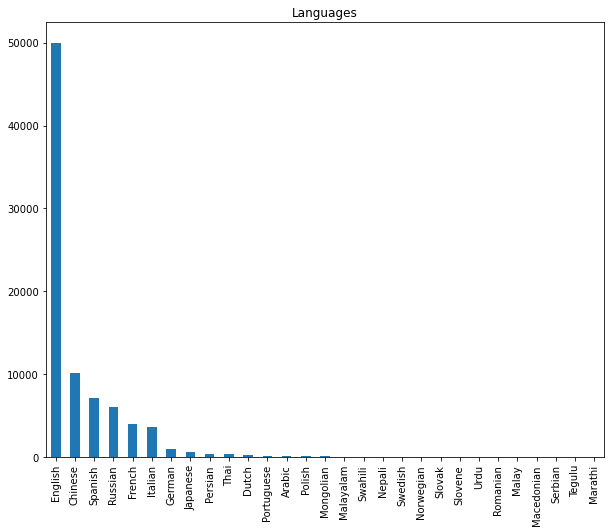

In [9]:
df['language'].value_counts().plot(kind='bar', title="Languages", figsize=(10,8))

## Access Method

<AxesSubplot:title={'center':'Access Method'}>

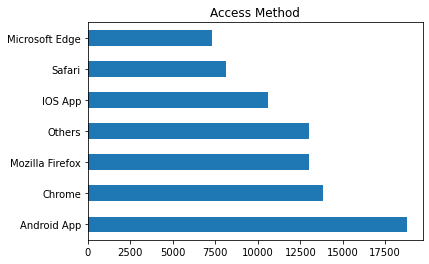

In [10]:
df['accessed_Ffom'].value_counts().plot(kind='barh', title="Access Method")

## Country

<AxesSubplot:title={'center':'Country'}>

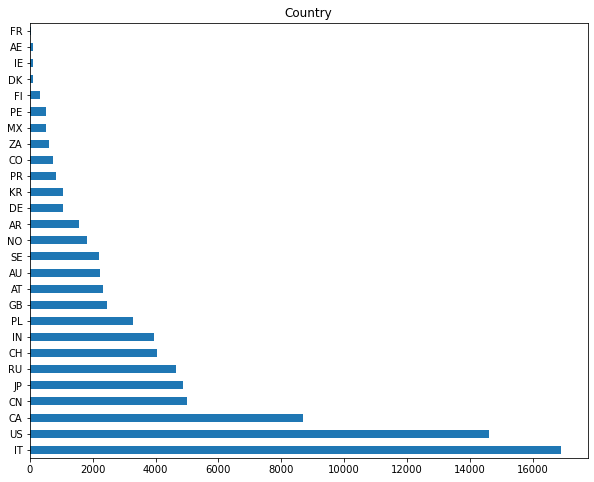

In [11]:
df['country'].value_counts().plot(kind='barh', title="Country", figsize=(10,8))

# Returned Items Only

In [21]:
df_returned = df[df["returned"] == 'Yes']
df_returned.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,returned,pay_method
6,2017-03-14 19:46:37.327,2090,Mozilla Firefox,49,Female,CN,Normal,English,Yes,Cash
22,2017-03-15 00:00:27.659,2203,IOS App,52,Male,JP,Premium,English,Yes,Credit Card
27,2017-03-15 00:00:02.296,4107,Microsoft Edge,50,Male,CA,Premium,Spanish,Yes,Cash
32,2017-03-15 00:01:15.747,2979,Safari,32,Female,IT,Premium,Spanish,Yes,Credit Card
51,2017-03-15 00:02:50.696,3301,IOS App,41,Female,US,Premium,Spanish,Yes,Others


Text(0.5, 1.0, 'Ages of Users')

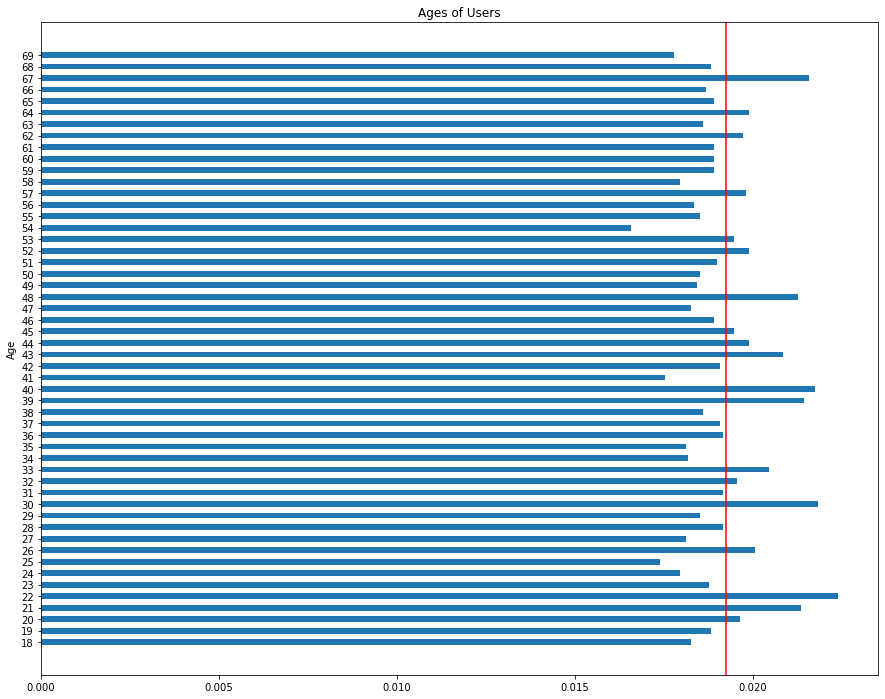

In [29]:
ages = df_returned['age'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(15,12))
plt.barh(ages.index, ages.values, 0.5, tick_label=ages.index)
plt.axvline(ages.values.mean(), color='r')
#, title="Ages of Users", ylabel="Age")
plt.ylabel("Age")
plt.title("Ages of Users")
#.plot(kind='barh', figsize=(15,12), title="Ages of Users", ylabel="Age")

In [42]:
df_returned['age'].value_counts().sort_values().head(5)

54    205
25    215
41    217
69    220
58    222
Name: age, dtype: int64

In [43]:
df['age'].value_counts().sort_values().head(5)

18    1545
55    1550
65    1552
35    1553
45    1562
Name: age, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

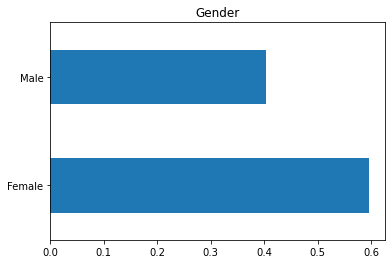

In [48]:
df_returned['gender'].value_counts(normalize=True).plot(kind='barh', title='Gender')

<AxesSubplot:title={'center':'Payment Methods'}>

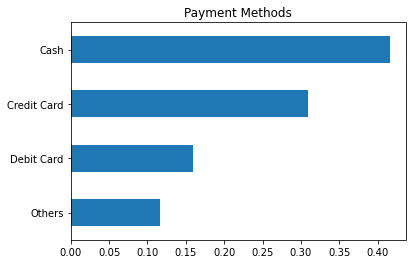

In [25]:
df_returned['pay_method'].value_counts(ascending=True, normalize=True).plot(kind='barh', title="Payment Methods")

<AxesSubplot:title={'center':'Membership Type'}>

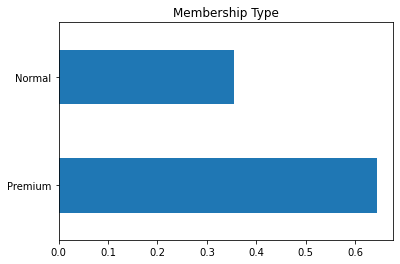

In [26]:
df_returned['membership'].value_counts(normalize=True).plot(kind='barh', title="Membership Type")

<AxesSubplot:title={'center':'Languages'}>

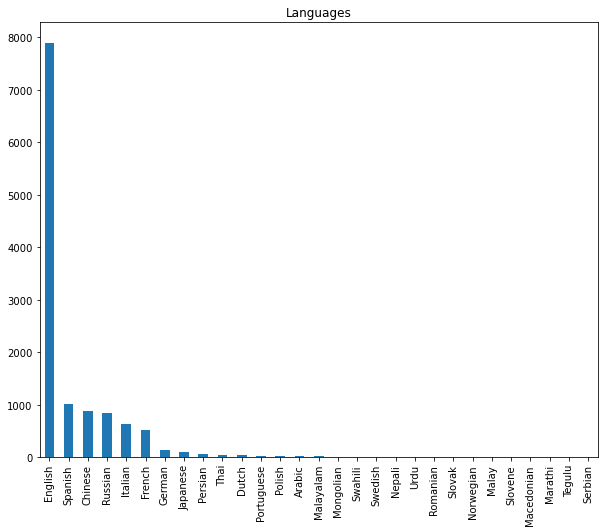

In [27]:
df_returned['language'].value_counts().plot(kind='bar', title="Languages", figsize=(10,8))

<AxesSubplot:title={'center':'Access Method'}>

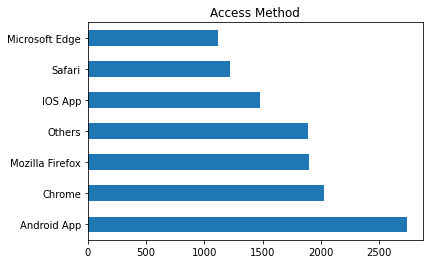

In [30]:
df_returned['accessed_Ffom'].value_counts().plot(kind='barh', title="Access Method")